# This project is a demonstration of Warner's Randomized Response Model.

Problem Statement :- 

What percentage of the students cheated in the 
last semester examinations?

Procedure :- 

We do a survey that first instructs students to toss a coin twice. If the student gets 'Tails' on the first toss, then the student has to answer the question number one, otherwise the student answers question number two.

Que1. Did you cheat in your last semester examinations? 

Que2. Did you get 'Tails' in the second toss?

As it is a possibility that students might not answer it comfortably so to address this questions mentioned above are useful. We will not know whether a 'yes' answer is due to the student's cheating or due to the student's getting a 'tails' in the second toss. This should put the student at ease to answer truthfully.

In the code, the function exactly performs the similar task as mentioned above. It is as random as a realistic survey of students.

Key point :-

While we don't know what an individual 'yes' means, we can estimate the 
propotion of cheaters using all the probabilities collectively.

In [59]:
import random 
import pandas as pd

In [60]:
import random
coin_ls = ["head", "tail"]
response_ls = ["yes", "no"]

def survey_responses(num):
    students_responses = []
    for i in range(num):
        toss_1 = random.choice(coin_ls)
        toss_2 = random.choice(coin_ls)
        
        if toss_1 == "tail":
            # Did you cheat in the last semester examinations? -- Only answered when the coin shows tail in first toss irrespective of the second toss 
            response = random.choice(response_ls) #answer to the question can be either a yes or no.
            students_responses.append(response)
            
        else:
            # if the first toss doesn't show a tails then the student will answer the second question
            if toss_2 == "tail":
                # Did you get a tail in the second toss? 
                students_responses.append(response_ls[0])
                
            else:
                students_responses.append(response_ls[1])
              
            
    return students_responses

In [61]:
def probability_of_yes(ls):

    yes_count = 0
    no_count = 0
    
    for i in range(len(ls)):
        if ls[i] == "yes":
            yes_count += 1
            
        else:
            no_count += 1
    print(f"Yes = {yes_count} and No = {no_count}")
    return ((yes_count)/(yes_count + no_count))*100

# Calculating probablities of various fields

Formulas used :- 

Derivation of the Formula of Probability of getting a 'yes' provided 
that question 1 was answered by the student. This is a case of conditional probability.

P(Yes) = P(Yes and Que1) + P(Yes and Que2) -- (1)

P(Yes|Que1) = [P(Yes and Que1)]/P(Que1) -- [Conditional Probability]

==> P(Yes and Que1) = P(Yes|Que1)P(Que1) --(2)

P(Yes|Que2) = [P(Yes and Que2)]/P(Que2) -- [Conditional Probability]

==> P(Yes and Que2) = P(Yes|Que2)P(Que2) --(3)

Using (2) and (3) in (1)

P(Yes) = P(Yes|Que1)P(Que1) + P(Yes|Que2)P(Que2) -- (4)

P(Yes|Que1) = [P(Yes) - P(Yes|Que2)P(Que2)]/P(Que1) -- (5)

Equation (5) is needed for further calculations. 

P(Que1) = P(Que2) = 1/2 (Equal to the probability of getting a head/tail)

P(Yes|Que2) = 1/2 (Answer to Question 2 can be either yes or no - depending on heads/tails)


In [62]:
num_of_students = int(input("How many students would you like to survey -- "))
indices = [i + 1 for i in range(num_of_students)]

student_responses = survey_responses(num_of_students)

print(f"P(Yes) = {probability_of_yes(student_responses)} %")

def Propotion_of_cheaters():
    p_yes_que1 = probability_of_yes(student_responses)
    print(f"P(Yes) = {p_yes_que1}%")
    return ((p_yes_que1/100 - (1/2)*(1/2))/(1/2))*100

print(f"The approximate proportion of the number of students who might have done cheating in the last semester exams = {Propotion_of_cheaters()}%")

How many students would you like to survey -- 1000
Yes = 481 and No = 519
P(Yes) = 48.1 %
Yes = 481 and No = 519
P(Yes) = 48.1%
The approximate proportion of the number of students who might have done cheating in the last semester exams = 46.20000000000001%


# The approximate proportion of the number of students who might have done cheating in the last semester exams = 46.20000000000001%

In [53]:
dataset = {'Index' : indices, "Student Responses" : student_responses}
df = pd.DataFrame(data = dataset)
df

,Index,Student Responses
0,1,no
1,2,yes
2,3,yes
3,4,yes
4,5,no
...,...,...
995,996,yes
996,997,no
997,998,yes
998,999,yes


<AxesSubplot:ylabel='Student Responses'>

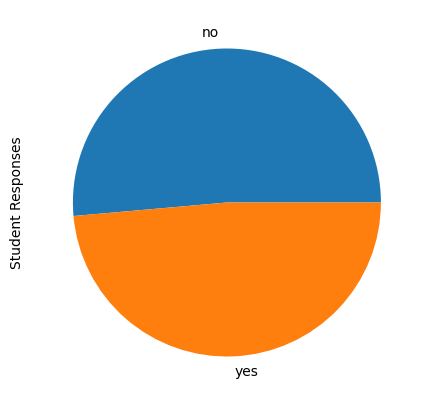

In [54]:
df["Student Responses"].value_counts().plot.pie(figsize = (5,5))